Optimization Pulse Stimulus on Nerve
====================================

This example is an extension of the Tutorial 5, the optimization formalism used in NRV is illustrated through a detailed example.

The objective of the first optimization problem is to **minimize a rectangle pulse stimulus energy required by a LIFE-electrode to trigger a single myelinated fibre**.

.. note::
    This example is run with only run on a 30-fibres nerve, for a small optimization (15 PSO particles, 40 iterations). Those parameters could be increase for a more realistic problem.


NRV INFO: On 30 axons to generate, there are 30 Myelinated and 0 Unmyelinated
NRV INFO: Axon packing initiated. This might take a while...


NRV INFO: Packing done!
NRV INFO: From Fascicle 0: Electrode/Axons overlap, 1 axons will be removed from the fascicle
NRV INFO: 30 axons remaining
NRV INFO: Mesh properties:
NRV INFO: Number of processes : 3
NRV INFO: Number of entities : 36
NRV INFO: Number of nodes : 8828
NRV INFO: Number of elements : 61854
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: setup the bilinear form
NRV INFO: FEN4NRV: setup the linear form
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 5.716473817825317 s


pyswarms.single.general_optimizer:   0%|          |0/40

pyswarms.single.general_optimizer:   2%|▎         |1/40, best_cost=0.428

pyswarms.single.general_optimizer:   5%|▌         |2/40, best_cost=0.428

pyswarms.single.general_optimizer:   8%|▊         |3/40, best_cost=0.291

pyswarms.single.general_optimizer:  10%|█         |4/40, best_cost=0.291

pyswarms.single.general_optimizer:  12%|█▎        |5/40, best_cost=0.291

pyswarms.single.general_optimizer:  15%|█▌        |6/40, best_cost=0.291

pyswarms.single.general_optimizer:  18%|█▊        |7/40, best_cost=0.248

pyswarms.single.general_optimizer:  20%|██        |8/40, best_cost=0.242

pyswarms.single.general_optimizer:  22%|██▎       |9/40, best_cost=0.242

pyswarms.single.general_optimizer:  25%|██▌       |10/40, best_cost=0.242

pyswarms.single.general_optimizer:  28%|██▊       |11/40, best_cost=0.242

pyswarms.single.general_optimizer:  30%|███       |12/40, best_cost=0.232

pyswarms.single.general_optimizer:  32%|███▎      |13/40, best_cost=0.232

pyswarms.single.general_optimizer:  35%|███▌      |14/40, best_cost=0.232

pyswarms.single.general_optimizer:  38%|███▊      |15/40, best_cost=0.232

pyswarms.single.general_optimizer:  40%|████      |16/40, best_cost=0.232

pyswarms.single.general_optimizer:  42%|████▎     |17/40, best_cost=0.232

pyswarms.single.general_optimizer:  45%|████▌     |18/40, best_cost=0.232

pyswarms.single.general_optimizer:  48%|████▊     |19/40, best_cost=0.232

pyswarms.single.general_optimizer:  50%|█████     |20/40, best_cost=0.231

pyswarms.single.general_optimizer:  52%|█████▎    |21/40, best_cost=0.231

pyswarms.single.general_optimizer:  55%|█████▌    |22/40, best_cost=0.231

pyswarms.single.general_optimizer:  57%|█████▊    |23/40, best_cost=0.23 

pyswarms.single.general_optimizer:  60%|██████    |24/40, best_cost=0.23

pyswarms.single.general_optimizer:  62%|██████▎   |25/40, best_cost=0.228

pyswarms.single.general_optimizer:  65%|██████▌   |26/40, best_cost=0.227

pyswarms.single.general_optimizer:  68%|██████▊   |27/40, best_cost=0.226

pyswarms.single.general_optimizer:  70%|███████   |28/40, best_cost=0.226

pyswarms.single.general_optimizer:  72%|███████▎  |29/40, best_cost=0.226

pyswarms.single.general_optimizer:  75%|███████▌  |30/40, best_cost=0.226

pyswarms.single.general_optimizer:  78%|███████▊  |31/40, best_cost=0.226

pyswarms.single.general_optimizer:  80%|████████  |32/40, best_cost=0.226

pyswarms.single.general_optimizer:  82%|████████▎ |33/40, best_cost=0.226

pyswarms.single.general_optimizer:  85%|████████▌ |34/40, best_cost=0.226

pyswarms.single.general_optimizer:  88%|████████▊ |35/40, best_cost=0.226

pyswarms.single.general_optimizer:  90%|█████████ |36/40, best_cost=0.226

pyswarms.single.general_optimizer:  92%|█████████▎|37/40, best_cost=0.226

pyswarms.single.general_optimizer:  95%|█████████▌|38/40, best_cost=0.226

pyswarms.single.general_optimizer:  98%|█████████▊|39/40, best_cost=0.226

pyswarms.single.general_optimizer: 100%|██████████|40/40, best_cost=0.226


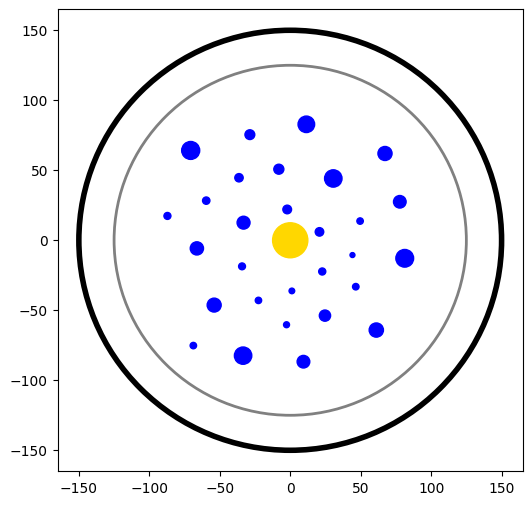

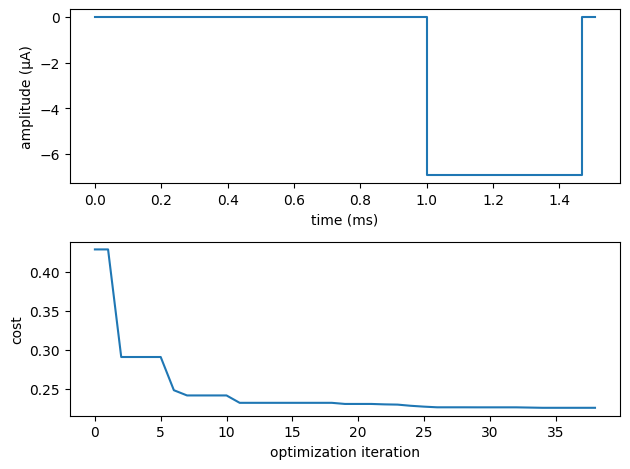

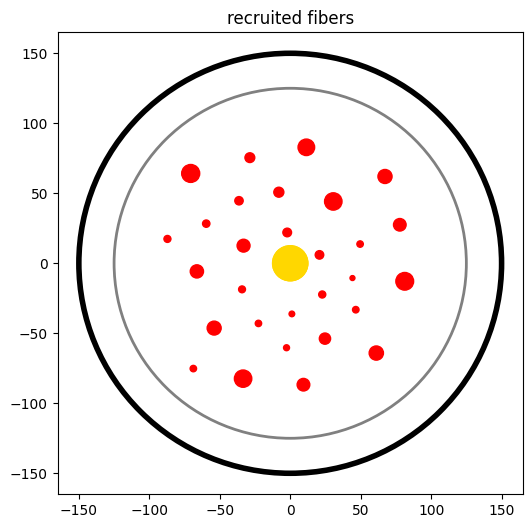

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import nrv

np.random.seed(4444)

if __name__ == '__main__':
    test_name = "Example_"
    dir_res = f"./{test_name}/"
    if not os.path.isdir(dir_res):
        os.mkdir(dir_res)

    ## Cost function definition
    my_cost0 = nrv.cost_function()

    # Static context
    nerve_file = dir_res + "nerve.json"

    outer_d = 5 # mm
    nerve_d = 300 # um
    nerve_l = 5000 # um

    fasc1_d = 250 # um
    fasc1_y = 0
    fasc1_z = 0
    n_ax1 = 30


    nerve_1 = nrv.nerve(length=nerve_l, diameter=nerve_d, Outer_D=outer_d)
    nerve_1.verbose = False
    axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0, M_stat="Ochoa_M", U_stat="Ochoa_U",)

    fascicle_1 = nrv.fascicle(ID=0)      #we can add diameter here / no need to call define_circular_contour (not tested)
    fascicle_1.define_circular_contour(fasc1_d)
    fascicle_1.fill_with_population(axons_diameters, axons_type, fit_to_size=True,delta=5)
    fascicle_1.generate_random_NoR_position()
    nerve_1.add_fascicle(fascicle=fascicle_1, y=fasc1_y, z=fasc1_z)

    # LIFE in neither of the two fascicles
    LIFE_stim0 = nrv.FEM_stimulation()
    LIFE_stim0.reshape_nerve(Length=nerve_l)
    life_d = 25 # um
    life_length = 1000 # um
    life_x_0_offset = life_length/2
    life_y_c_0 = 0
    life_z_c_0 = 0
    elec_0 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_0_offset, life_y_c_0, life_z_c_0)

    dummy_stim = nrv.stimulus()
    dummy_stim.pulse(0, 0.1, 10)
    LIFE_stim0.add_electrode(elec_0, dummy_stim)
    nerve_1.attach_extracellular_stimulation(LIFE_stim0)

    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    nerve_1.plot(ax)

    nerve_1.compute_electrodes_footprints()
    nerve_1.set_parameters(postproc_script="is_recruited")
    _ = nerve_1.save(fname=nerve_file, extracel_context=True)
    #nerve_1(t_sim=5)
    #del nerve_1


    t_sim = 5
    dt = 0.005
    kwarg_sim = {
        "dt":dt,
        "t_sim":t_sim,
    }

    static_context = nerve_file
    my_cost0.set_static_context(nerve_1, **kwarg_sim)

    # Context modifier
    t_start = 1
    I_max_abs = 100

    cm_0 = nrv.biphasic_stimulus_CM(start=t_start, s_cathod="0", t_cathod="1", s_anod=0)
    my_cost0.set_context_modifier(cm_0)

    # Cost evaluation
    costR = nrv.recrutement_count_CE(reverse=True)
    costC = nrv.stim_energy_CE()

    cost_evaluation = costR + 0.01 * costC
    my_cost0.set_cost_evaluation(cost_evaluation)


    ## Optimizer
    pso_kwargs = {
        "maxiter" : 40,
        "n_particles" : 20,
        "opt_type" : "local",
        "options": {'c1': 0.55, 'c2': 0.55, 'w': 0.75, 'k': 2, 'p': 1},
        "bh_strategy": "reflective",
    }
    pso_opt = nrv.PSO_optimizer(**pso_kwargs)

    ## Problem definition
    my_prob = nrv.Problem()
    my_prob.costfunction = my_cost0
    my_prob.optimizer = pso_opt


    # Optimization
    t_end = 0.5
    bounds0 = (
        (0, I_max_abs),
        (0.01, t_end),
    )
    pso_kwargs_pb_0 = {
        "dimensions" : 2,
        "bounds" : bounds0,
        "comment":"pulse"}

    res0 = my_prob(**pso_kwargs_pb_0)

    res_sim = res0.compute_best_pos(my_cost0)

    # Plot results on master process
    fig_costs, axs_costs = plt.subplots(2, 1)

    stim = cm_0(res0.x, nerve_1).extra_stim.stimuli[0]
    stim.plot(axs_costs[0])
    axs_costs[0].set_xlabel("best stimulus shape")
    axs_costs[0].set_xlabel("time (ms)")
    axs_costs[0].set_ylabel("amplitude (µA)")

    res0.plot_cost_history(axs_costs[1])
    axs_costs[1].set_xlabel("optimization iteration")
    axs_costs[1].set_ylabel("cost")
    fig_costs.tight_layout()

    fig_best, ax_best = plt.subplots(figsize=(6,6))
    ax_best.set_title("recruited fibers")
    res_sim.plot_recruited_fibers(ax_best)

